In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [51]:
# CSI1
person = [0.58, 0.7, 0.66, 0.64, 0.55, 0.66, 0.53, 0.58]
person_rand = [0.49, 0.51, 0.55, 0.46, 0.49, 0.52, 0.52, 0.5]
face = [0.66, 0.61, 0.6, 0.78, 0.62, 0.54, 0.74, 0.67]
face_rand = [0.47, 0.52, 0.61, 0.5, 0.51, 0.52, 0.55, 0.46]
animal = [0.65, 0.58, 0.65, 0.65, 0.63, 0.57, 0.54, 0.67]
animal_rand = [0.49, 0.48, 0.49, 0.59, 0.45, 0.61, 0.54, 0.43]
vehicle = [0.53, 0.54, 0.56, 0.5, 0.5, 0.58, 0.63, 0.54]
vehicle_rand = [0.55, 0.54, 0.48, 0.59, 0.38, 0.52, 0.44, 0.46]
outdoor = [0.54, 0.59, 0.45, 0.44, 0.48, 0.52, 0.5, 0.49]
outdoor_rand = [0.42, 0.43, 0.52, 0.54, 0.45, 0.48, 0.6, 0.45]
sports = [0.54, 0.49, 0.49, 0.56, 0.6, 0.63, 0.58, 0.56]
sports_rand = [0.52, 0.55, 0.53, 0.42, 0.54, 0.51, 0.56, 0.48]
food = [0.51, 0.7, 0.67, 0.54, 0.73, 0.8, 0.72, 0.59]
food_rand = [0.42, 0.57, 0.61, 0.51, 0.48, 0.55, 0.47, 0.49]
furniture = [0.56, 0.56, 0.54, 0.48, 0.57, 0.52, 0.6, 0.59]
furniture_rand = [0.64, 0.49, 0.53, 0.56, 0.64, 0.54, 0.53, 0.53]
tool = [0.47, 0.51, 0.54, 0.5, 0.51, 0.47, 0.49, 0.56]
tool_rand = [0.48, 0.49, 0.53, 0.48, 0.5, 0.53, 0.49, 0.58]

In [52]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [53]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, title, leg_loc):
    plt.rc('font', size=20)
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title(title)
    ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'], loc=leg_loc)
    ax.patches
    i = 0
    for p, pval in zip(ax.patches, pvals_corrected):
        if pval < 0.001:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '***', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.01:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '**', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.05:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '*', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        # ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 'n.s.', ha='center')
        i += 1
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [54]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    return pvals_corrected

face :
t-statistic: 4.1912128388142005 p-value: 0.00045294505967640586
animal :
t-statistic: 3.8028216516116675 p-value: 0.000969985391119486
person :
t-statistic: 4.587540567154101 p-value: 0.00021118154167633986
furniture :
t-statistic: -0.21149097972441383 p-value: 0.41777596969432207
vehicle :
t-statistic: 1.8448653378129596 p-value: 0.043157633059386705
sports :
t-statistic: 1.7955234285494948 p-value: 0.04708960908340172
food :
t-statistic: 3.471480530360415 p-value: 0.0018706985863119216
outdoor :
t-statistic: 0.5358913016456655 p-value: 0.3002223635016646
tool :
t-statistic: -0.22622533930347188 p-value: 0.4121478458439648
Bonferroni:

Reject: [ True  True  True False False False  True False False]
pvals corrected: [0.00407651 0.00872987 0.00190063 1.         0.3884187  0.42380648
 0.01683629 1.         1.        ]
Benjamini/Hochberg:

Reject: [ True  True  True False False False  True False False]
pvals corrected: [0.00203825 0.00290996 0.00190063 0.41777597 0.07063441 0.07063

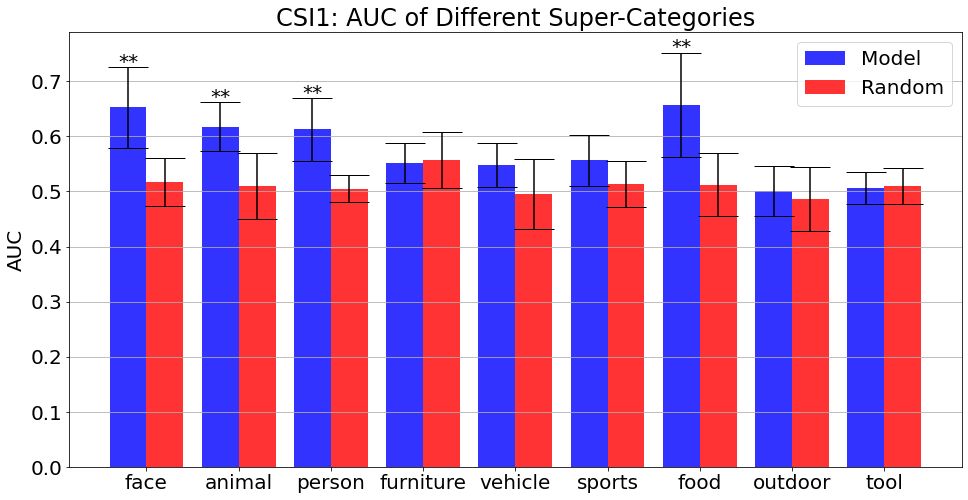

In [55]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories1 = categories
categories1_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI1: AUC of Different Super-Categories', leg_loc='upper right')

In [56]:
# CSI2
person = [0.64, 0.49, 0.52, 0.66, 0.56, 0.45, 0.66, 0.49]
person_rand = [0.52, 0.49, 0.51, 0.5, 0.51, 0.54, 0.49, 0.5]
face = [0.76, 0.52, 0.54, 0.83, 0.5, 0.52, 0.7, 0.81]
face_rand = [0.51, 0.52, 0.75, 0.53, 0.51, 0.51, 0.58, 0.47]
animal = [0.48, 0.48, 0.53, 0.63, 0.54, 0.5, 0.51, 0.51]
animal_rand = [0.54, 0.49, 0.53, 0.48, 0.49, 0.45, 0.53, 0.49]
vehicle = [0.46, 0.5, 0.51, 0.51, 0.53, 0.51, 0.58, 0.53]
vehicle_rand = [0.52, 0.53, 0.47, 0.5, 0.47, 0.51, 0.53, 0.52]
outdoor = [0.56, 0.56, 0.49, 0.49, 0.49, 0.49, 0.5, 0.54]
outdoor_rand = [0.58, 0.41, 0.43, 0.5, 0.41, 0.52, 0.51, 0.42]
sports = [0.73, 0.71, 0.51, 0.74, 0.44, 0.48, 0.48, 0.49]
sports_rand = [0.51, 0.61, 0.53, 0.52, 0.63, 0.53, 0.53, 0.54]
food = [0.55, 0.53, 0.49, 0.69, 0.51, 0.51, 0.6, 0.59]
food_rand = [0.49, 0.53, 0.5, 0.56, 0.53, 0.48, 0.49, 0.5]
furniture = [0.52, 0.5, 0.56, 0.66, 0.44, 0.58, 0.63, 0.61]
furniture_rand = [0.57, 0.52, 0.49, 0.52, 0.58, 0.53, 0.47, 0.48]
tool = [0.53, 0.54, 0.49, 0.55, 0.58, 0.49, 0.53, 0.5]
tool_rand = [0.53, 0.52, 0.51, 0.53, 0.54, 0.51, 0.49, 0.49]

face :
t-statistic: 1.6976869614398062 p-value: 0.05583703187296445
animal :
t-statistic: 1.1114378604524207 p-value: 0.14255155201326206
person :
t-statistic: 1.6844800004617542 p-value: 0.057120969000328044
furniture :
t-statistic: 1.4434054023419038 p-value: 0.08545427408185512
vehicle :
t-statistic: 0.6782027220810777 p-value: 0.25434922363875134
sports :
t-statistic: 0.46529006583079346 p-value: 0.3244393890522165
food :
t-statistic: 1.936559882246685 p-value: 0.036624714047944665
outdoor :
t-statistic: 1.6820733127217236 p-value: 0.05735769654591831
tool :
t-statistic: 0.8689035287132764 p-value: 0.19977560142694895
Bonferroni:

Reject: [False False False False False False False False False]
pvals corrected: [0.50253329 1.         0.51408872 0.76908847 1.         1.
 0.32962243 0.51621927 1.        ]
Benjamini/Hochberg:

Reject: [False False False False False False False False False]
pvals corrected: [0.12905482 0.21382733 0.12905482 0.15381769 0.28614288 0.32443939
 0.12905482 0

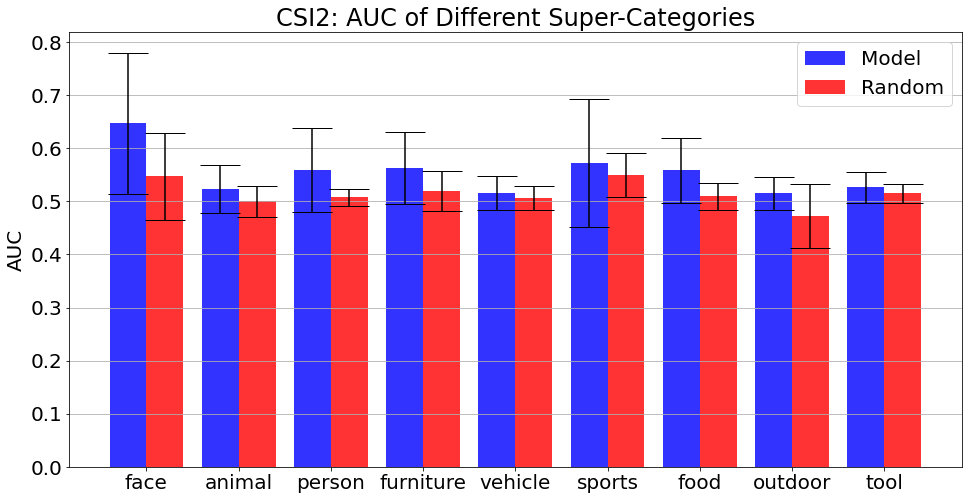

In [57]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories2 = categories
categories2_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI2: AUC of Different Super-Categories', leg_loc='upper right')

In [58]:
# CSI3
person = [0.68, 0.68, 0.57, 0.68, 0.65, 0.62, 0.5, 0.61]
person_rand = [0.53, 0.56, 0.51, 0.51, 0.47, 0.52, 0.51, 0.48]
face = [0.7, 0.71, 0.79, 0.68, 0.7, 0.57, 0.62, 0.7]
face_rand = [0.57, 0.47, 0.46, 0.46, 0.45, 0.54, 0.47, 0.51]
animal = [0.66, 0.54, 0.71, 0.62, 0.61, 0.58, 0.65, 0.69]
animal_rand = [0.55, 0.49, 0.53, 0.53, 0.48, 0.51, 0.43, 0.52]
vehicle = [0.5, 0.65, 0.56, 0.51, 0.49, 0.63, 0.66, 0.49]
vehicle_rand = [0.61, 0.54, 0.52, 0.57, 0.46, 0.56, 0.43, 0.55]
outdoor = [0.48, 0.49, 0.5, 0.58, 0.53, 0.55, 0.57, 0.51]
outdoor_rand = [0.57, 0.61, 0.5, 0.53, 0.39, 0.42, 0.5, 0.6]
sports = [0.71, 0.62, 0.59, 0.63, 0.59, 0.69, 0.54, 0.54]
sports_rand = [0.54, 0.59, 0.53, 0.5, 0.53, 0.56, 0.52, 0.52]
food = [0.53, 0.66, 0.52, 0.57, 0.67, 0.62, 0.57, 0.67]
food_rand = [0.5, 0.5, 0.42, 0.5, 0.46, 0.56, 0.48, 0.55]
furniture = [0.53, 0.58, 0.57, 0.61, 0.51, 0.6, 0.6, 0.59]
furniture_rand = [0.52, 0.52, 0.59, 0.52, 0.54, 0.52, 0.52, 0.54]
tool = [0.57, 0.54, 0.55, 0.51, 0.48, 0.53, 0.52, 0.51]
tool_rand = [0.46, 0.51, 0.45, 0.45, 0.51, 0.52, 0.51, 0.51]

face :
t-statistic: 6.924783645603457 p-value: 3.5202021626644688e-06
animal :
t-statistic: 5.304776069724598 p-value: 5.560069778885538e-05
person :
t-statistic: 4.560669526474579 p-value: 0.00022227772426868658
furniture :
t-statistic: 2.6078264921736554 p-value: 0.010330070425693134
vehicle :
t-statistic: 0.9295763478330981 p-value: 0.18417113944720942
sports :
t-statistic: 3.203497326084473 p-value: 0.003188019041724638
food :
t-statistic: 3.8675841486881115 p-value: 0.000853669185436974
outdoor :
t-statistic: 0.36099150979599776 p-value: 0.3617474645419064
tool :
t-statistic: 2.4776372073786073 p-value: 0.013294991906288052
Bonferroni:

Reject: [ True  True  True False False  True  True False False]
pvals corrected: [3.16818195e-05 5.00406280e-04 2.00049952e-03 9.29706338e-02
 1.00000000e+00 2.86921714e-02 7.68302267e-03 1.00000000e+00
 1.19654927e-01]
Benjamini/Hochberg:

Reject: [ True  True  True  True False  True  True False  True]
pvals corrected: [3.16818195e-05 2.50203140e-

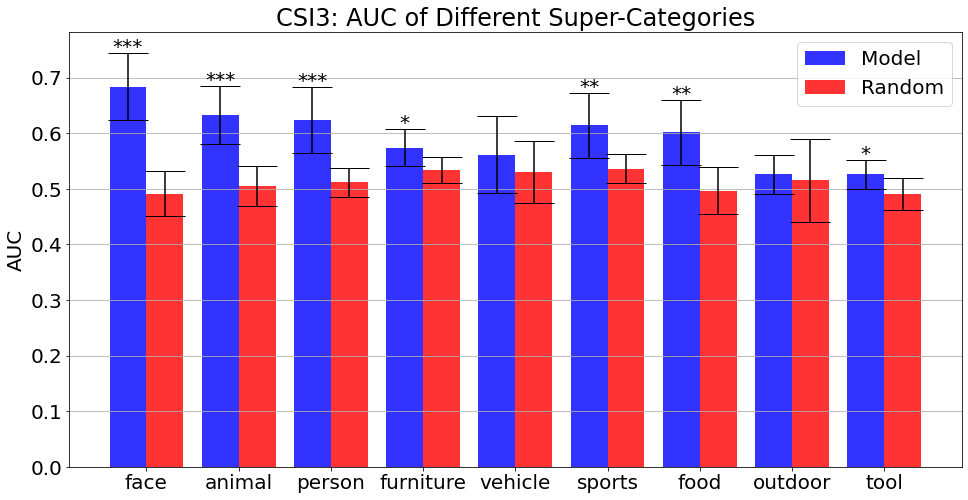

In [59]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories3 = categories
categories3_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI3: AUC of Different Super-Categories', leg_loc='upper right')

In [61]:
# CSI4
person = [0.46, 0.58, 0.66, 0.51, 0.55, 0.53, 0.53, 0.6]
person_rand = [0.49, 0.43, 0.52, 0.51, 0.55, 0.48, 0.57, 0.57]
face = [0.52, 0.74, 0.49, 0.47, 0.58, 0.48, 0.52, 0.65]
face_rand = [0.62, 0.54, 0.51, 0.64, 0.55, 0.48, 0.49, 0.55]
animal = [0.48, 0.59, 0.54, 0.46, 0.52, 0.56, 0.55, 0.54]
animal_rand = [0.51, 0.46, 0.47, 0.52, 0.57, 0.46, 0.45, 0.49]
vehicle = [0.52, 0.6, 0.52, 0.53, 0.53, 0.52, 0.45, 0.62]
vehicle_rand = [0.52, 0.48, 0.57, 0.57, 0.59, 0.48, 0.51, 0.59] 
outdoor = [0.29, 0.54, 0.54, 0.49, 0.48, 0.51, 0.5, 0.57]
outdoor_rand = [0.41, 0.5, 0.58, 0.65, 0.5, 0.55, 0.56, 0.47]
sports = [0.56, 0.61, 0.51, 0.6, 0.53, 0.57, 0.47, 0.62]
sports_rand = [0.54, 0.49, 0.58, 0.66, 0.48, 0.57, 0.46, 0.57]
food = [0.44, 0.58, 0.52, 0.52, 0.62, 0.62, 0.56, 0.49]
food_rand = [0.5, 0.54, 0.45, 0.52, 0.49, 0.5, 0.52, 0.48]
furniture = [0.54, 0.48, 0.47, 0.5, 0.62, 0.58, 0.53, 0.56]
furniture_rand = [0.51, 0.49, 0.54, 0.44, 0.5, 0.53, 0.49, 0.55]
tool = [0.51, 0.52, 0.52, 0.51, 0.61, 0.42, 0.52, 0.61]
tool_rand = [0.55, 0.53, 0.53, 0.55, 0.53, 0.58, 0.52, 0.6]

face :
t-statistic: 0.22258705026210793 p-value: 0.4135357616749697
animal :
t-statistic: 1.8683999909565807 p-value: 0.04138781669058686
person :
t-statistic: 1.363636363636363 p-value: 0.09710395492772808
furniture :
t-statistic: 1.3096357894010189 p-value: 0.10570205721975763
vehicle :
t-statistic: -0.1004675443581553 p-value: 0.46069886545356326
sports :
t-statistic: 0.5046524326871712 p-value: 0.3108263387079294
food :
t-statistic: 1.7917611690342126 p-value: 0.0474021168972998
outdoor :
t-statistic: -0.9356742923277075 p-value: 0.18265052598339215
tool :
t-statistic: -0.8968688630202678 p-value: 0.19247607420137403
Bonferroni:

Reject: [False False False False False False False False False]
pvals corrected: [1.         0.37249035 0.87393559 0.95131851 1.         1.
 0.42661905 1.         1.        ]
Benjamini/Hochberg:

Reject: [False False False False False False False False False]
pvals corrected: [0.46069887 0.21330953 0.23782963 0.23782963 0.46069887 0.39963386
 0.21330953 0.

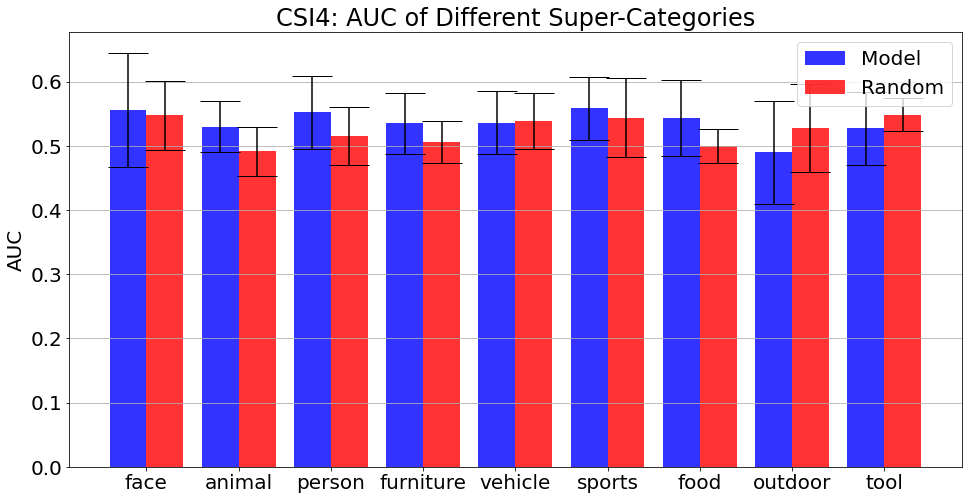

In [62]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories4 = categories
categories4_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI4: AUC of Different Super-Categories', leg_loc='upper right')

face :
t-statistic: 4.884037011602731 p-value: 0.00012069407486177315
animal :
t-statistic: 7.248689439948399 p-value: 2.1162198189084545e-06
person :
t-statistic: 8.335168172818825 p-value: 4.232863282710474e-07
furniture :
t-statistic: 2.18565438813489 p-value: 0.02316418693426372
vehicle :
t-statistic: 1.5389262739217133 p-value: 0.07305707776761139
sports :
t-statistic: 2.2496925739516054 p-value: 0.020538852628103222
food :
t-statistic: 4.962288673033821 p-value: 0.00010431210526650622
outdoor :
t-statistic: 0.5083323207040841 p-value: 0.30956784433859286
tool :
t-statistic: 0.596132947215005 p-value: 0.28030099817453846
Bonferroni:

Reject: [ True  True  True False False False  True False False]
pvals corrected: [1.08624667e-03 1.90459784e-05 3.80957695e-06 2.08477682e-01
 6.57513700e-01 1.84849674e-01 9.38808947e-04 1.00000000e+00
 1.00000000e+00]
Benjamini/Hochberg:

Reject: [ True  True  True  True False  True  True False False]
pvals corrected: [2.71561668e-04 9.52298919e-06 

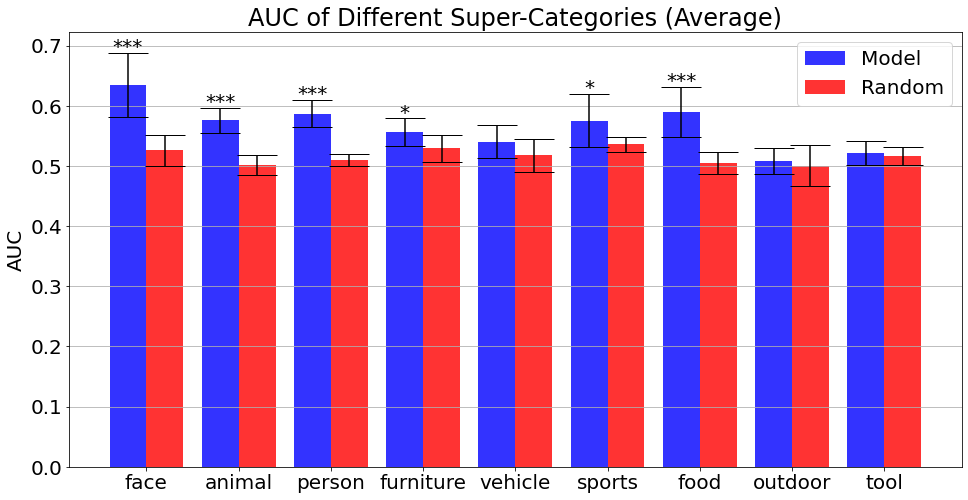

In [63]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = (np.array(categories1)+np.array(categories2)+np.array(categories3)+np.array(categories4))/4.0
categories_rand = (np.array(categories1_rand)+np.array(categories2_rand)+np.array(categories3_rand)+np.array(categories4_rand))/4.0
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'AUC of Different Super-Categories (Average)', leg_loc='upper right')